# Feature Selection

In [11]:
# Import libraries
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
import nbimporter
from data_preprocessing import df_final

### Feature Importance (Random Forest / XGBoost feature importance scores) to rank variables.

In [2]:
#Split features (X) and target (y)
X = df_final.drop("num", axis=1)  
y = df_final["num"]       

### Random forest 

In [3]:
rf=RandomForestClassifier(random_state=42)
rf.fit(X,y)

## Feature importance values
importances=rf.feature_importances_
importances

# Sort features by importance
feat_importances = pd.DataFrame({"Feature":X.columns,
                                 "Importance":importances
}).sort_values(by="Importance",ascending=False)

print(feat_importances)

         Feature  Importance
3        thalach    0.134586
4        oldpeak    0.108873
2           chol    0.108586
0            age    0.102768
5             ca    0.099493
1       trestbps    0.093381
8      cp_asympt    0.058604
17      thal_rev    0.055528
16     thal_norm    0.044134
13    exang_true    0.040137
15      slope_up    0.027626
6       sex_male    0.025016
14    slope_flat    0.022144
11   restecg_hyp    0.020676
12  restecg_norm    0.019790
10      fbs_true    0.016366
9      cp_notang    0.013948
7      cp_angina    0.008344


C:\Users\2027\AppData\Local\Temp\ipykernel_9536\1172074570.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=feat_importances, palette="viridis")


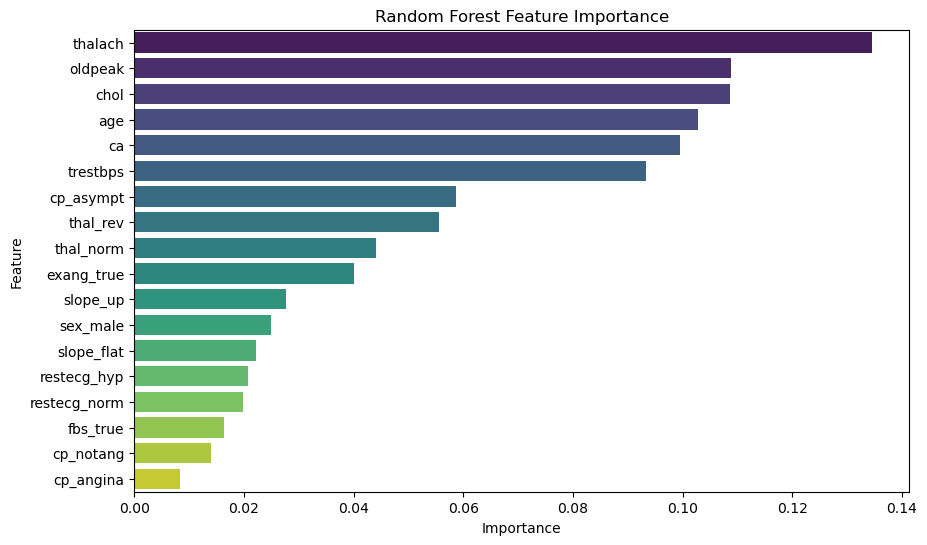

In [4]:
plt.figure(figsize=(10,6))
sns.barplot(x="Importance", y="Feature", data=feat_importances, palette="viridis")
plt.title("Random Forest Feature Importance")
plt.show()

### XGBOOST

In [5]:
# XGBoost
xgb_model = xgb.XGBClassifier( eval_metric="logloss", random_state=42)
xgb_model.fit(X, y)

xgb_importances = pd.DataFrame({
    "Feature": X.columns,
    "Importance": xgb_model.feature_importances_
}).sort_values(by="Importance", ascending=False)

print("XGBoost Feature Importance:")
print(xgb_importances)

XGBoost Feature Importance:
         Feature  Importance
16     thal_norm    0.224414
8      cp_asympt    0.134203
5             ca    0.070067
9      cp_notang    0.058187
17      thal_rev    0.056475
6       sex_male    0.053766
14    slope_flat    0.043443
4        oldpeak    0.043133
13    exang_true    0.041765
3        thalach    0.037998
0            age    0.036843
10      fbs_true    0.036727
11   restecg_hyp    0.031520
2           chol    0.031199
7      cp_angina    0.030244
1       trestbps    0.026992
15      slope_up    0.026568
12  restecg_norm    0.016456


C:\Users\2027\AppData\Local\Temp\ipykernel_9536\837050508.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=xgb_importances, palette="coolwarm")


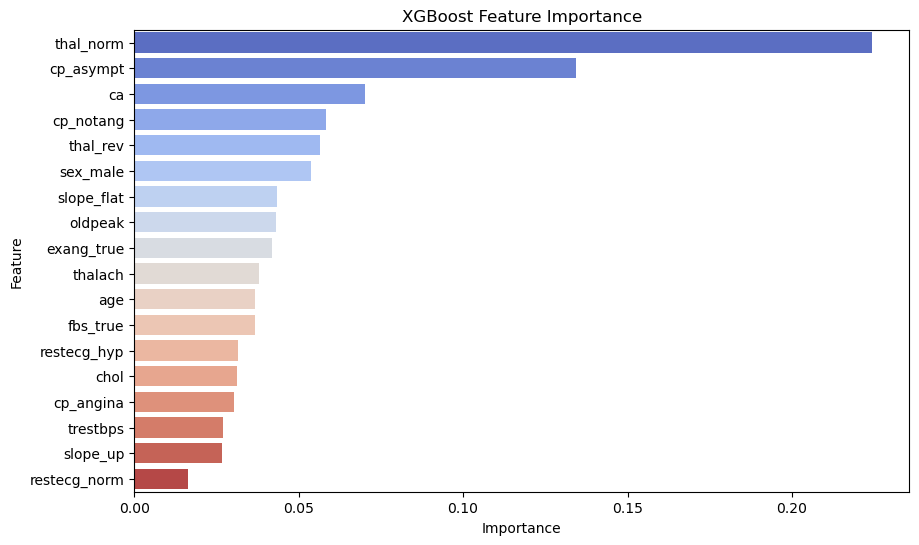

In [6]:
plt.figure(figsize=(10,6))
sns.barplot(x="Importance", y="Feature", data=xgb_importances, palette="coolwarm")
plt.title("XGBoost Feature Importance")
plt.show()

### Apply Recursive Feature Elimination (RFE) 

In [7]:
rfe = RFE(estimator=rf, n_features_to_select=10)
rfe.fit(X, y)

# show features selected
selected_features = X.columns[rfe.support_]
print("Selected Features by RFE with Random Forest:", selected_features.tolist())


Selected Features by RFE with Random Forest: ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca', 'cp_asympt', 'exang_true', 'thal_norm', 'thal_rev']


In [8]:
# Data with selected features
X_rfe = X[selected_features]
X_rfe

,age,trestbps,chol,thalach,oldpeak,ca,cp_asympt,exang_true,thal_norm,thal_rev
0,0.947829,0.760168,-0.260565,0.011339,1.082105,-0.714692,0.0,0.0,0.0,0.0
1,1.387592,1.614151,0.762015,-1.826496,0.393311,2.496088,1.0,1.0,1.0,0.0
2,1.387592,-0.663137,-0.337740,-0.907578,1.340403,1.425828,1.0,1.0,0.0,1.0
3,-1.910633,-0.093815,0.067433,1.630385,2.115297,-0.714692,0.0,0.0,1.0,0.0
4,-1.470869,-0.093815,-0.820090,0.974015,0.307211,-0.714692,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
298,-0.701284,-0.435408,0.163903,1.105289,-0.898179,1.425828,0.0,0.0,1.0,0.0
299,0.288184,0.020049,-0.762208,0.798983,-0.898179,-0.714692,1.0,1.0,0.0,1.0
300,-0.591343,-0.777002,-1.881257,-1.038852,-0.209384,2.496088,0.0,0.0,1.0,0.0
301,2.157178,-0.663137,0.434018,-1.257642,-0.725980,0.355568,0.0,1.0,1.0,0.0


### Chi-Square Test to check feature significance

In [9]:
#MinMax scaling required for chi2
m_scaler = MinMaxScaler()
X_scaled = m_scaler.fit_transform(X)

# Apply chi2 test
chi_scores, p_values = chi2(X_scaled, y)

chi2_results = pd.DataFrame({
    "Feature": X.columns,
    "Chi2 Score": chi_scores,
    "p-value": p_values
}).sort_values(by="Chi2 Score", ascending=False)

print("Chi-Square Test Results:")
print(chi2_results)


Chi-Square Test Results:
         Feature  Chi2 Score       p-value
17      thal_rev   47.409017  1.253253e-09
8      cp_asympt   44.634060  4.737076e-09
13    exang_true   41.084115  2.582170e-08
16     thal_norm   40.623283  3.216496e-08
5             ca   36.974210  1.823475e-07
15      slope_up   28.038945  1.224828e-05
14    slope_flat   22.204196  1.825075e-04
9      cp_notang   21.402158  2.635157e-04
4        oldpeak   16.482819  2.435228e-03
12  restecg_norm    7.813459  9.865545e-02
6       sex_male    7.374929  1.173525e-01
11   restecg_hyp    6.568679  1.605142e-01
10      fbs_true    5.637445  2.279095e-01
7      cp_angina    4.867798  3.011332e-01
3        thalach    3.276213  5.127099e-01
0            age    1.311959  8.593433e-01
1       trestbps    0.599801  9.630858e-01
2           chol    0.203377  9.951672e-01


 ### Selecting only the most relevant features for modeling.

In [10]:
# RF top 10
rf_top10 = feat_importances["Feature"].head(10).tolist()

# XGB top 10
xgb_top10 = xgb_importances["Feature"].head(10).tolist()

# RFE selected features (10 already)
rfe_feats = selected_features.tolist()

# Chi2 significant features (p-value < 0.05)
chi2_feats = chi2_results[chi2_results["p-value"] < 0.05]["Feature"].tolist()

# union of all
final_selected = list(set(rf_top10 + xgb_top10 + rfe_feats + chi2_feats))

final_selected_df = X[final_selected]
# Data frame of final selected features
print("Final Selected Features DataFrame:")
display(final_selected_df)
print(f"Number of selected features: {len(final_selected)}")

Final Selected Features DataFrame:


,chol,oldpeak,exang_true,trestbps,thal_norm,age,slope_up,slope_flat,ca,cp_asympt,thalach,cp_notang,sex_male,thal_rev
0,-0.260565,1.082105,0.0,0.760168,0.0,0.947829,0.0,0.0,-0.714692,0.0,0.011339,0.0,1.0,0.0
1,0.762015,0.393311,1.0,1.614151,1.0,1.387592,0.0,1.0,2.496088,1.0,-1.826496,0.0,1.0,0.0
2,-0.337740,1.340403,1.0,-0.663137,0.0,1.387592,0.0,1.0,1.425828,1.0,-0.907578,0.0,1.0,1.0
3,0.067433,2.115297,0.0,-0.093815,1.0,-1.910633,0.0,0.0,-0.714692,0.0,1.630385,1.0,1.0,0.0
4,-0.820090,0.307211,0.0,-0.093815,1.0,-1.470869,1.0,0.0,-0.714692,0.0,0.974015,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.163903,-0.898179,0.0,-0.435408,1.0,-0.701284,1.0,0.0,1.425828,0.0,1.105289,1.0,1.0,0.0
299,-0.762208,-0.898179,1.0,0.020049,0.0,0.288184,1.0,0.0,-0.714692,1.0,0.798983,0.0,1.0,1.0
300,-1.881257,-0.209384,0.0,-0.777002,1.0,-0.591343,1.0,0.0,2.496088,0.0,-1.038852,1.0,1.0,0.0
301,0.434018,-0.725980,1.0,-0.663137,1.0,2.157178,1.0,0.0,0.355568,0.0,-1.257642,0.0,0.0,0.0


Number of selected features: 14
